# PREDICTING RAIN IN AUSTRALIA

## problem statement

### The task is to develop a machine learning model to predict whether it will rain tomorrow at a given location in Australia, using historical weather data. The dataset includes features such as temperature, humidity, wind speed, and cloud cover, among others. 

## Logistic Regression

### step1 importing the libraries

In [23]:
#importing the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### step2 importing the dataset

In [25]:
dataset = pd.read_csv(r"C:\Users\mahen\Desktop\code unnati\weatherAUS.csv")

In [5]:
dataset.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

### step3 Exploratory data analysis

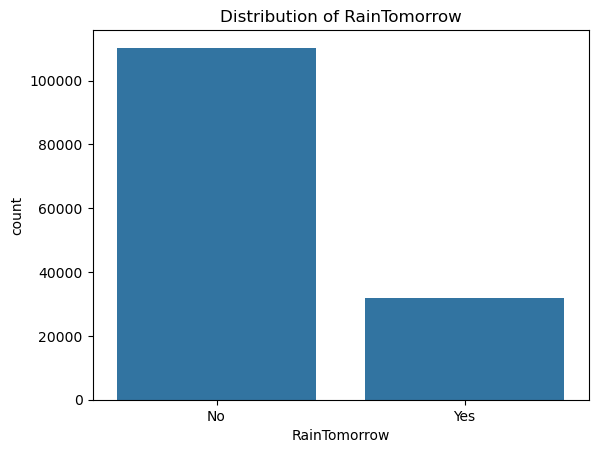

In [7]:
# Visualize the distribution of the target variable 'RainTomorrow'
sns.countplot(x='RainTomorrow', data=dataset)
plt.title('Distribution of RainTomorrow')
plt.show()

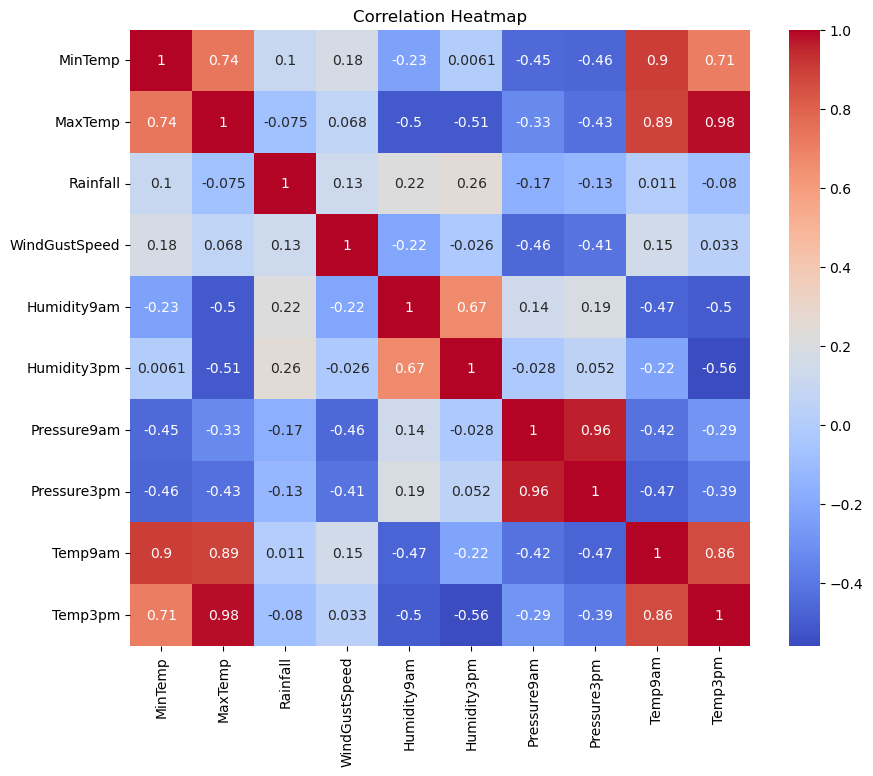

In [9]:
# Correlation heatmap of selected features
plt.figure(figsize=(10, 8))
corr = dataset[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 
                     'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### step4 data preprocessing

In [3]:
#Select relevant columns for Logistic Regression
columns_to_use = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 
                  'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [11]:
# Filter the dataset to include only the selected columns and 'RainTomorrow'
weather_data_cleaned = dataset[columns_to_use + ['RainTomorrow']].copy()


In [12]:
# Handle missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
weather_data_cleaned[columns_to_use[:-1]] = imputer.fit_transform(weather_data_cleaned[columns_to_use[:-1]])

In [13]:
# Convert 'RainToday' and 'RainTomorrow' to binary variables (Yes -> 1, No -> 0)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
weather_data_cleaned['RainToday'] = label_encoder.fit_transform(weather_data_cleaned['RainToday'])
weather_data_cleaned['RainTomorrow'] = label_encoder.fit_transform(weather_data_cleaned['RainTomorrow'])

### step5 Dividing data into x and y variables

In [14]:
# Separate features and target
X = weather_data_cleaned[columns_to_use]
y = weather_data_cleaned['RainTomorrow']

### step6 Splitting the data set into training setand testing set

In [15]:
# Splitting the data set into training setand testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### step7 Feature engineering

In [16]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### step8 Training the model

In [17]:
#Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=1.0)
classifier.fit(X_train,y_train)


LogisticRegression()

### step9 predicting the test set results

In [18]:
#predicting the test set results
y_pred = classifier.predict(X_test)

### step10 Evaluating the model

In [19]:
#Evaluating the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [20]:
# Print the evaluation results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


Accuracy: 0.824487831706311
Confusion Matrix:
[[20738  1160   114]
 [ 3387  2930   103]
 [  274    68   318]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     22012
           1       0.70      0.46      0.55      6420
           2       0.59      0.48      0.53       660

    accuracy                           0.82     29092
   macro avg       0.72      0.63      0.66     29092
weighted avg       0.81      0.82      0.81     29092



## KNN

### step1 importing the libraries¶

In [13]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier 
import warnings
warnings.filterwarnings("ignore")

### step2 importing the dataset

In [15]:
#loading the dataset
data = pd.read_csv(r"C:\Users\mahen\Desktop\code unnati\weatherAUS.csv")

In [24]:
data.shape

(145460, 23)

In [25]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### step3 Exploratory data analysis

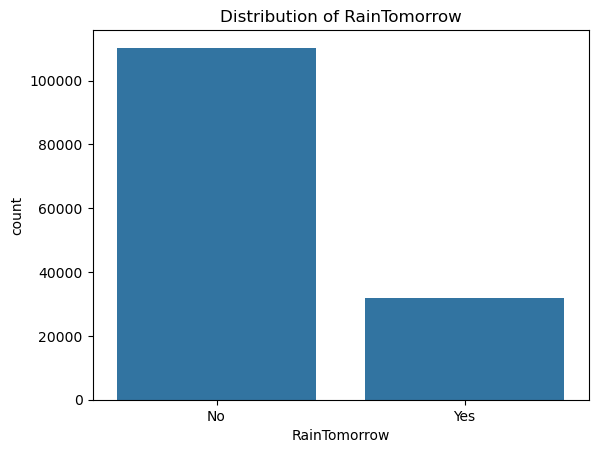

In [26]:
# Visualizing the distribution of the target variable 'RainTomorrow'
sns.countplot(x='RainTomorrow', data=data)
plt.title('Distribution of RainTomorrow')
plt.show()

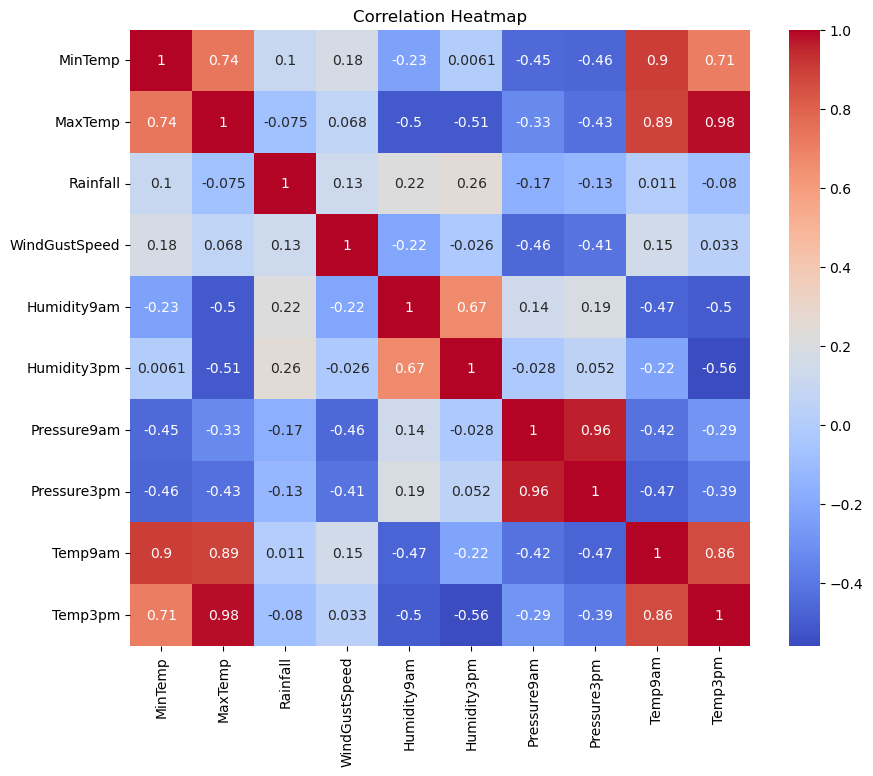

In [28]:
# Correlation heatmap of selected features
plt.figure(figsize=(10, 8))
corr = data[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 
                     'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### step4 data preprocessing

In [17]:
#Select relevant columns for KNN
columns_to_use = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
                  'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [19]:
# Filtering the dataset to include only the selected columns and 'RainTomorrow'
weather_data_cleaned =data[columns_to_use + ['RainTomorrow']].copy()


In [23]:
# Handling missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
weather_data_cleaned[columns_to_use[:-1]] = imputer.fit_transform(weather_data_cleaned[columns_to_use[:-1]])


In [25]:
# Convert 'RainToday' and 'RainTomorrow' to binary variables (Yes -> 1, No -> 0)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
weather_data_cleaned['RainToday'] = label_encoder.fit_transform(weather_data_cleaned['RainToday'])
weather_data_cleaned['RainTomorrow'] = label_encoder.fit_transform(weather_data_cleaned['RainTomorrow'])

### step5 Dividing data into x and y variables

In [27]:
#Segregating variables: Independent and Dependent Variables
X = weather_data_cleaned[columns_to_use]
y = weather_data_cleaned['RainTomorrow']
X.shape, y.shape

((145460, 11), (145460,))

### step6 Splitting the data set into training setand testing set

In [31]:
# Splitting the data into training set and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### step7 Feature engineering

In [33]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
error_rates = []

In [37]:
#Implementing KNN Classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)


### step8 Training the model

In [39]:
# Train the model on the training data
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

### step9 predicting the test set results

In [41]:
# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)


### step10 Evaluating the model

In [43]:
# Evaluating the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8156537879829506
Confusion Matrix:
[[20403  1549    60]
 [ 3282  3066    72]
 [  303    97   260]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89     22012
           1       0.65      0.48      0.55      6420
           2       0.66      0.39      0.49       660

    accuracy                           0.82     29092
   macro avg       0.72      0.60      0.64     29092
weighted avg       0.80      0.82      0.80     29092



# Random Forest

### step1 importing the libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


### step2 importing the dataset

In [3]:
# Loading the dataset
data = pd.read_csv(r"C:\Users\mahen\Desktop\code unnati\weatherAUS.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### step3 Exploratory data analysis

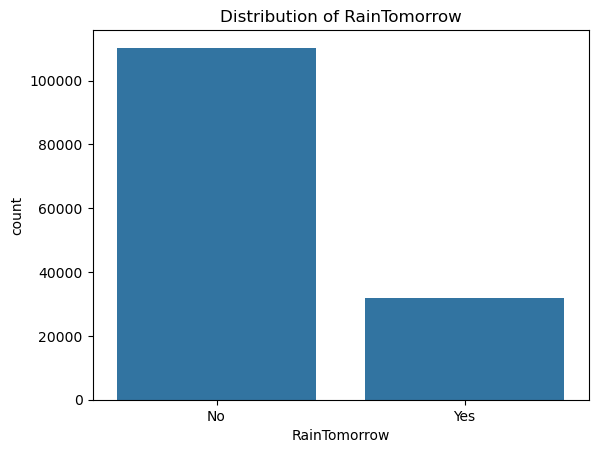

In [5]:
# Visualize the distribution of the target variable 'RainTomorrow'
sns.countplot(x='RainTomorrow', data=data)
plt.title('Distribution of RainTomorrow')
plt.show()

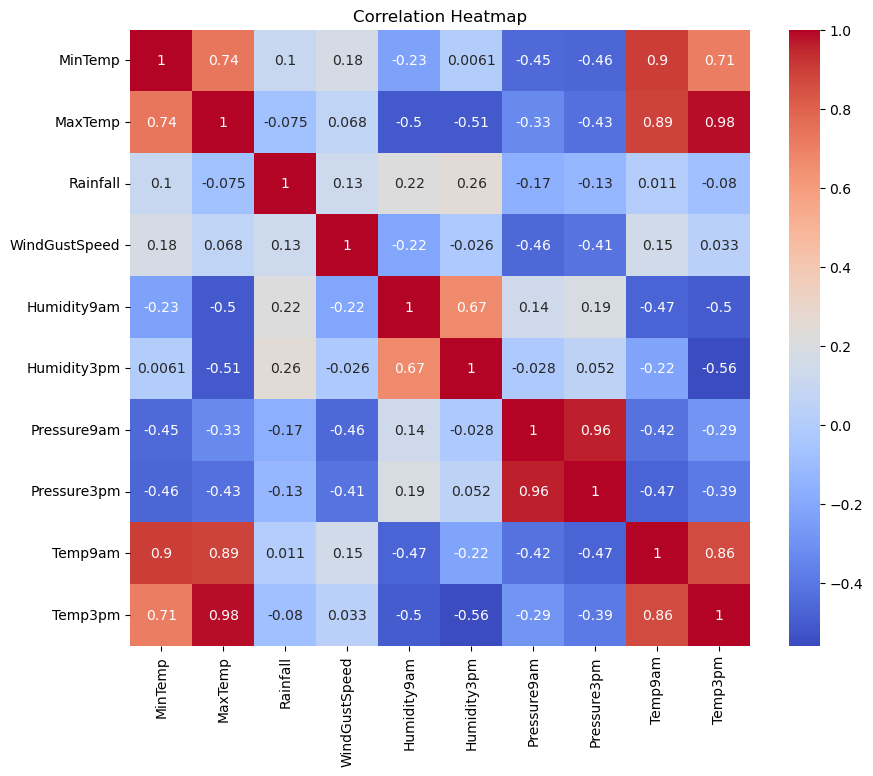

In [11]:
# Correlation heatmap of selected features
plt.figure(figsize=(10, 8))
corr = data[['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 
                     'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



### step4 data preprocessing

In [13]:
#data preprocessing
# Selecting relevant columns for Random Forest
columns_to_use = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 
                  'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday']

In [15]:
# Filtering the dataset to include only the selected columns and 'RainTomorrow'
weather_data_cleaned = data[columns_to_use + ['RainTomorrow']].copy()

In [17]:
# Handling missing values
imputer = SimpleImputer(strategy='median')
weather_data_cleaned[columns_to_use[:-1]] = imputer.fit_transform(weather_data_cleaned[columns_to_use[:-1]])

In [19]:
# Converting 'RainToday' and 'RainTomorrow' to binary variables (Yes -> 1, No -> 0)
label_encoder = LabelEncoder()
weather_data_cleaned['RainToday'] = label_encoder.fit_transform(weather_data_cleaned['RainToday'])
weather_data_cleaned['RainTomorrow'] = label_encoder.fit_transform(weather_data_cleaned['RainTomorrow'])


### step5 Dividing data into x and y variables

In [21]:
#Segregating variables: Independent and Dependent Variables
X = weather_data_cleaned[columns_to_use]
y = weather_data_cleaned['RainTomorrow']

### step6 Splitting the data set into training setand testing set

In [23]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### step7 Feature engineering

In [25]:
#scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### step8 Training the model

In [27]:
#training the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

### step9 predicting the test set results

In [29]:
#predicting the test set results
y_pred = rf_model.predict(X_test_scaled)


### step10 Evaluating the model

In [33]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

#the evaluation results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)




Accuracy: 0.8333562491406572
Confusion Matrix:
[[20838  1117    57]
 [ 3217  3116    87]
 [  291    79   290]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90     22012
           1       0.72      0.49      0.58      6420
           2       0.67      0.44      0.53       660

    accuracy                           0.83     29092
   macro avg       0.75      0.62      0.67     29092
weighted avg       0.82      0.83      0.82     29092



## DECISION TREE

### step1 importing the libraries

In [35]:
#importing the libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### step2 importing the dataset

In [37]:
#Loading the dataset
data = pd.read_csv(r"C:\Users\mahen\Desktop\code unnati\weatherAUS.csv")
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### step3 data preprocessing

In [39]:
# Selecting relevant columns for Decision Tree
columns_to_use = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 
                  'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday']


In [41]:
# Filtering the dataset to include only the selected columns and 'RainTomorrow'
weather_data_cleaned = data[columns_to_use + ['RainTomorrow']].copy()

In [43]:
# Handling missing values
imputer = SimpleImputer(strategy='median')
weather_data_cleaned[columns_to_use[:-1]] = imputer.fit_transform(weather_data_cleaned[columns_to_use[:-1]])


In [45]:
# Converting 'RainToday' and 'RainTomorrow' to binary variables (Yes -> 1, No -> 0)
label_encoder = LabelEncoder()
weather_data_cleaned['RainToday'] = label_encoder.fit_transform(weather_data_cleaned['RainToday'])
weather_data_cleaned['RainTomorrow'] = label_encoder.fit_transform(weather_data_cleaned['RainTomorrow'])


### step4 Dividing data into x and y variables

In [47]:
#Segregating variables: Independent and Dependent Variables
X = weather_data_cleaned[columns_to_use]
y = weather_data_cleaned['RainTomorrow']

### step5 Splitting the data set into training setand testing set

In [49]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### step6 Feature engineering

In [51]:
#scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### step7 Training the model

In [53]:
#Initialize the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

In [55]:
# Define the parameter grid to search
param_grid = {
    'max_depth': [5, 10, 15, 20, None],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy'],        # Function to measure the quality of a split
    'max_features': [None, 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
}


In [57]:
# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
print(f'Best parameters: {grid_search.best_params_}')

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [59]:
# Using the best estimator (with the best found hyperparameters)
best_dt_classifier = grid_search.best_estimator_


### step8 predicting the test set results

In [ ]:
# Make predictions on the test set using the tuned model
y_pred = best_dt_classifier.predict(X_test_scaled)


### step9 Evaluating the model

In [63]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8217035611164581
Confusion Matrix:
[[20720  1240    52]
 [ 3425  2919    76]
 [  308    86   266]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89     22012
           1       0.69      0.45      0.55      6420
           2       0.68      0.40      0.50       660

    accuracy                           0.82     29092
   macro avg       0.74      0.60      0.65     29092
weighted avg       0.81      0.82      0.81     29092

